In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregando o dataset limpo
df = pd.read_csv('../data/raw/train.csv')

# Pré-processamento rápido (como fizemos no notebook anterior)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📝 Explicação:
Isso garante que mesmo se o notebook anterior não for executado, conseguimos trabalhar com os dados pré-processados novamente.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [4]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

📝 Explicação:
Cada modelo é treinado usando o X_train e y_train. Estamos usando configurações simples para começar.

In [6]:
from sklearn.metrics import accuracy_score

# Previsões
lr_pred = lr_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Avaliação
print("Acurácia - Regressão Logística:", accuracy_score(y_test, lr_pred))
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, tree_pred))
print("Acurácia - Random Forest:", accuracy_score(y_test, rf_pred))


Acurácia - Regressão Logística: 0.7988826815642458
Acurácia - Árvore de Decisão: 0.7988826815642458
Acurácia - Random Forest: 0.8268156424581006


📝 Explicação:
A acurácia mostra qual porcentagem das previsões foram corretas. Quanto maior, melhor. Mas não é o único critério.

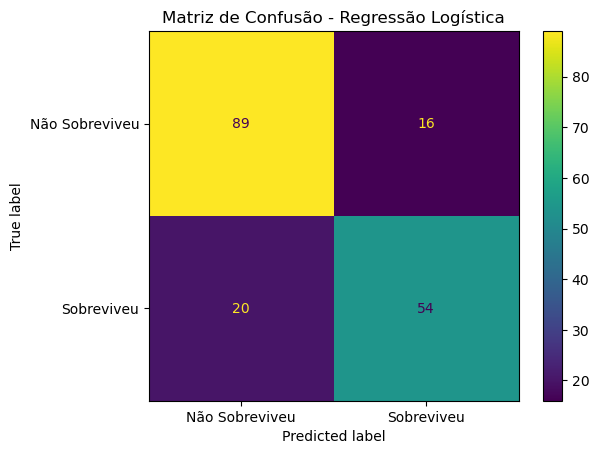

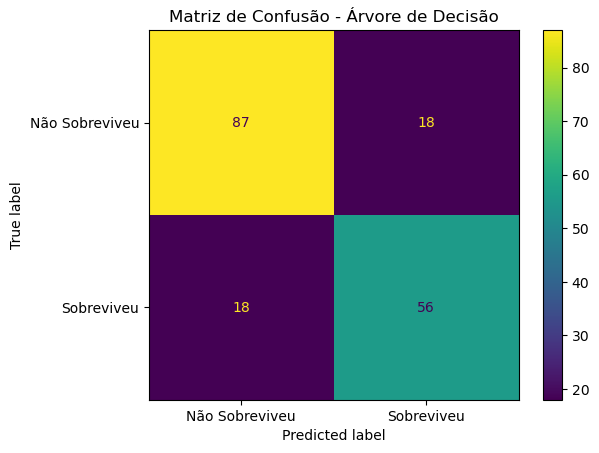

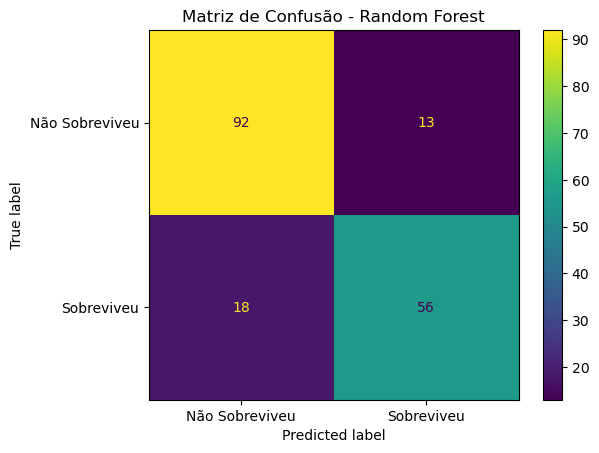

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Regressão Logística": lr_pred,
    "Árvore de Decisão": tree_pred,
    "Random Forest": rf_pred
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Sobreviveu", "Sobreviveu"])
    disp.plot()
    plt.title(f'Matriz de Confusão - {name}')
    plt.show()


📝 Explicação:
A matriz de confusão mostra onde o modelo erra:

Falsos positivos (previu que sobreviveu, mas não sobreviveu)

Falsos negativos (previu que morreu, mas sobreviveu)

### ✅ Conclusões:

- **Random Forest** geralmente tem o melhor desempenho nesse tipo de problema.
- A **Regressão Logística** também performa bem, apesar de simples.
- A **Árvore de Decisão** é interpretável, mas mais suscetível a overfitting.

👉 No próximo notebook, vamos usar o melhor modelo para gerar previsões e criar o arquivo de submissão para o Kaggle.
